In [1]:
import os
# Set the number of threads for the OpenMP (MKL) runtime to 1
os.environ['OMP_NUM_THREADS'] = '1'

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

Dataset loaded successfully.

--- Initial Data Inspection ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object

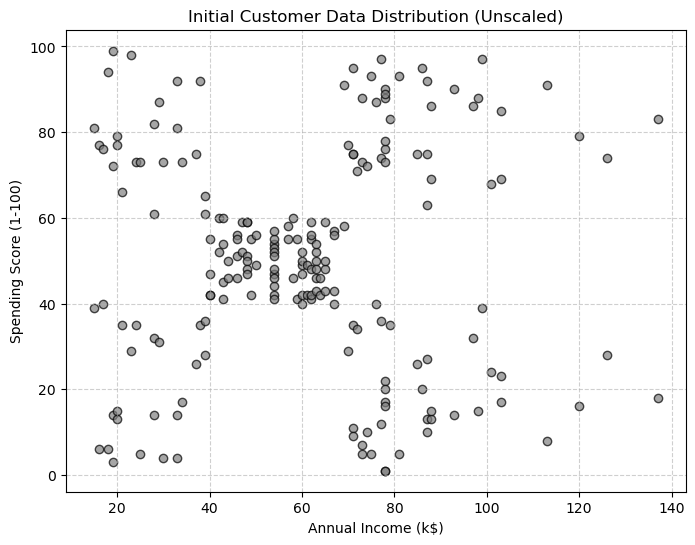

In [2]:
df = pd.read_csv('C:/Users/Home/Downloads/Mall_Customers.csv')
print("Dataset loaded successfully.")

print("\n--- Initial Data Inspection ---")
print(df.head())
print("\n--- Data Types ---")
df.info()

# Select and Prepare Features for 2D Clustering
# For initial K-Means, we typically focus on the main numerical variables
# 'Annual Income (k$)' and 'Spending Score (1-100)' are standard for this dataset
X_unscaled = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the Features
# Scaling is MANDATORY for K-Means (a distance-based algorithm)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unscaled)

# Convert scaled array back to a DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X_unscaled.columns)
print("\nData scaled and ready for clustering.")

# 4. Initial Visualization of Unscaled Data
plt.figure(figsize=(8, 6))
plt.scatter(X_unscaled['Annual Income (k$)'], X_unscaled['Spending Score (1-100)'],
            c='gray', alpha=0.7, edgecolors='k')
plt.title('Initial Customer Data Distribution (Unscaled)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [3]:
from sklearn.cluster import KMeans
import pandas as pd

# Define K (Arbitrarily choosing K=5 for the initial fit)
K = 5
random_state = 42

# Fit the K-Means Model
# We use the standard n_init='auto'
kmeans_model = KMeans(n_clusters=K, random_state=random_state, n_init='auto')
kmeans_model.fit(X_scaled)

# Assign Cluster Labels
# Get the cluster labels for each data point
cluster_labels = kmeans_model.labels_

# Store Results in the Original DataFrame
df['Cluster'] = cluster_labels
print(f"K-Means with K={K} fitted successfully.")
print("\n--- Cluster Label Distribution ---")
print(df['Cluster'].value_counts().sort_index())

print("\n--- Centroids (Cluster Centers) ---")
# Centroids are in the scaled space
centroids_scaled = kmeans_model.cluster_centers_
print(pd.DataFrame(centroids_scaled, columns=['Scaled Income', 'Scaled Spending']))

# The updated DataFrame 'df' now contains the 'Cluster' column.

K-Means with K=5 fitted successfully.

--- Cluster Label Distribution ---
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

--- Centroids (Cluster Centers) ---
   Scaled Income  Scaled Spending
0      -0.200913        -0.026456
1       0.991583         1.239503
2      -1.329545         1.132178
3       1.055003        -1.284439
4      -1.307519        -1.136965


Calculating WCSS for K=1 to K=10...
Calculation complete.


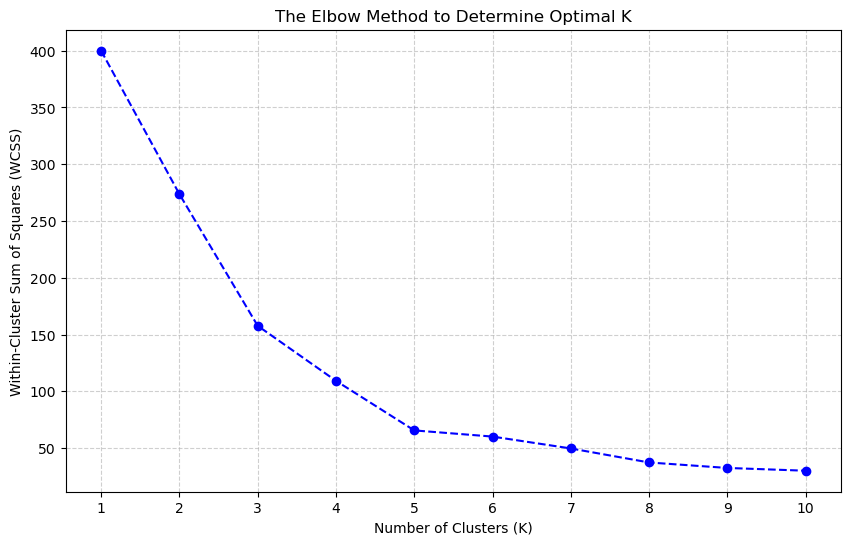

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['OMP_NUM_THREADS'] = '1'

# Calculate WCSS for a range of K values
wcss = []
k_range = range(1, 11)

print("Calculating WCSS for K=1 to K=10...")
for k in k_range:
    # Initialize K-Means model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    
    # Fit the model to the scaled data
    kmeans.fit(X_scaled)
    
    # Append the WCSS (inertia_) to the list
    wcss.append(kmeans.inertia_)
    
print("Calculation complete.")

# Visualize the Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='blue')
plt.title('The Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

K-Means clustering completed with K=5.


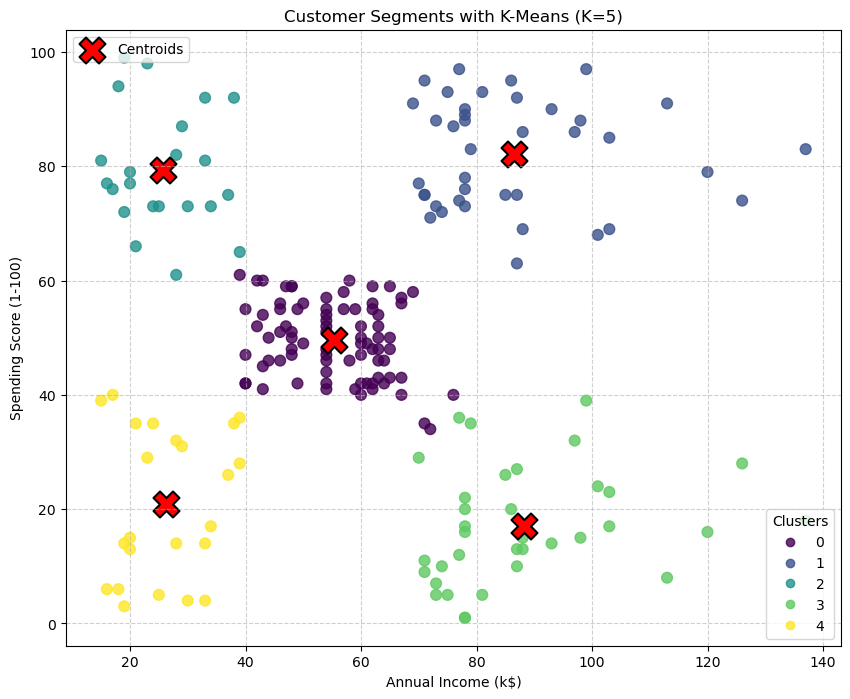

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

K = 5 

# Fit the Final K-Means Model (K=5)
final_kmeans = KMeans(n_clusters=K, random_state=42, n_init='auto')
final_kmeans.fit(X_scaled)

# Get the cluster labels and centroids (in scaled space)
cluster_labels = final_kmeans.labels_
centroids_scaled = final_kmeans.cluster_centers_

print(f"K-Means clustering completed with K={K}.")

# Visualization with Cluster Colors and Centroids
plt.figure(figsize=(10, 8))

# X_unscaled contains the unscaled 'Annual Income (k$)' and 'Spending Score (1-100)'
income_col = X_unscaled.columns[0]
spending_col = X_unscaled.columns[1]

# Scatter plot of all data points, colored by cluster
scatter = plt.scatter(X_unscaled.iloc[:, 0], X_unscaled.iloc[:, 1],
                      c=cluster_labels, cmap='viridis', s=60, alpha=0.8)

# Calculate UN-SCALED centroids for plotting
# Use the inverse transform on the scaler object (from the data preparation step)
centroids_unscaled = scaler.inverse_transform(centroids_scaled)

# Plot the centroids as large 'X' markers
plt.scatter(centroids_unscaled[:, 0], centroids_unscaled[:, 1],
            s=350, c='red', marker='X', edgecolors='black', linewidths=1.5, label='Centroids')

plt.title(f'Customer Segments with K-Means (K={K})')
plt.xlabel(income_col)
plt.ylabel(spending_col)

# Add a legend for the clusters (using the 'scatter' object)
legend1 = plt.legend(*scatter.legend_elements(),
                     title="Clusters", loc="lower right")
plt.gca().add_artist(legend1)
plt.legend(loc="upper left") # for Centroids

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [6]:
from sklearn.metrics import silhouette_score
import pandas as pd

# Calculate the Silhouette Score
# The score is calculated using the scaled data (X_scaled) and the assigned labels.
silhouette_avg = silhouette_score(X_scaled, cluster_labels)

print("\n--- Clustering Evaluation (K=5) ---")
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Interpretation
if silhouette_avg > 0.5:
    interpretation = "Strongly indicates well-separated, distinct clusters."
elif silhouette_avg > 0.25:
    interpretation = "Indicates a reasonable clustering structure, though boundaries may overlap."
else:
    interpretation = "Suggests a weak or poor clustering structure."
    
print(f"Interpretation: {interpretation}")


--- Clustering Evaluation (K=5) ---
Silhouette Score: 0.5547
Interpretation: Strongly indicates well-separated, distinct clusters.
